# Final Project: Letter Recognition

## Utils

In [1]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

The data set is called Letter Recognition and is from UC Irvine Machine Learning Reposetory.  
> "The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli.  Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15.  We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000."

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
letter_recognition = fetch_ucirepo(id=59) 
  
# data (as pandas dataframes) 
X = letter_recognition.data.features 
y = letter_recognition.data.targets 
  
# metadata 
print(letter_recognition.metadata) 
  
# variable information 
print(letter_recognition.variables) 


{'uci_id': 59, 'name': 'Letter Recognition', 'repository_url': 'https://archive.ics.uci.edu/dataset/59/letter+recognition', 'data_url': 'https://archive.ics.uci.edu/static/public/59/data.csv', 'abstract': 'Database of character image features; try to identify the letter', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 20000, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['lettr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Thu Sep 28 2023', 'dataset_doi': '10.24432/C5ZP40', 'creators': ['David Slate'], 'intro_paper': None, 'additional_info': {'summary': 'The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts wa

In [4]:
df = pd.concat([X, y], axis=1)
df = df.rename(columns={'lettr': 'letter'}) #rename lettr to letter to improve readability 
display(df)

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,letter
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,T
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,I
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,D
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,N
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7,D
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7,C
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4,T
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8,S


## Visualizations

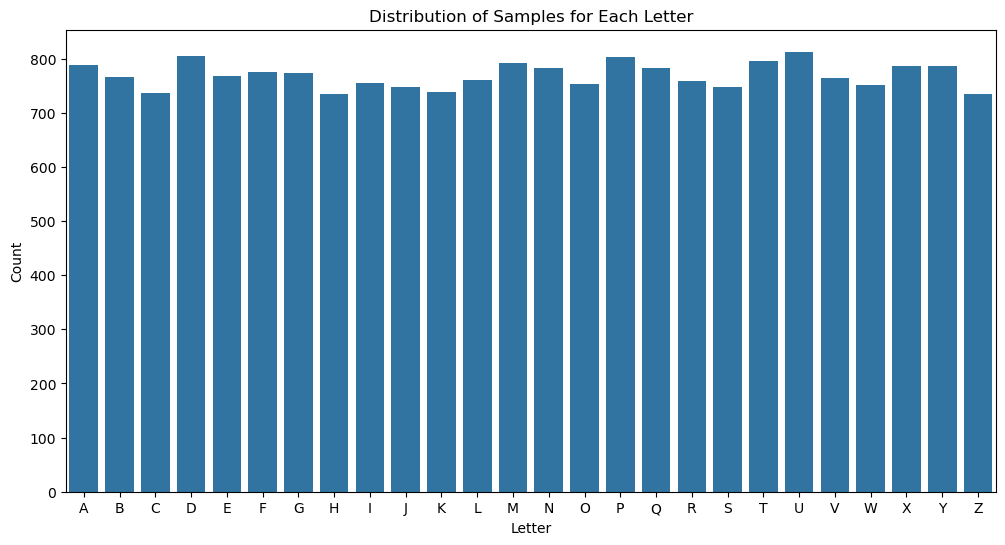

In [5]:
# Plot count of each letter, shows how many samples exist for each letter
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='letter', order=sorted(df['letter'].unique()))
plt.title('Distribution of Samples for Each Letter')
plt.xlabel('Letter')
plt.ylabel('Count')
plt.show()

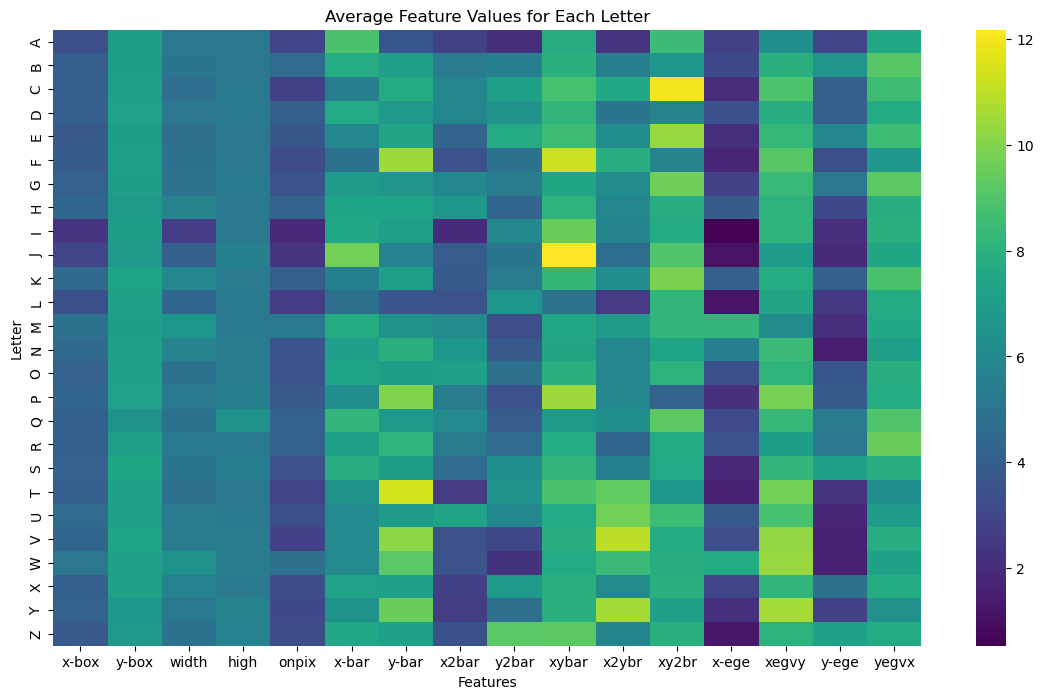

In [6]:
# Group by letter and compute mean of each feature
letter_means = df.groupby('letter').mean()

# Create heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(letter_means, annot=False, cmap='viridis', xticklabels=True, yticklabels=sorted(df['letter'].unique()))
plt.title('Average Feature Values for Each Letter')
plt.xlabel('Features')
plt.ylabel('Letter')
plt.show()

## Data Preprocessing

### Convert letters to numbers
>label encoding for logistic regression 

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(df['letter'])  # array of 0–25

### Scale Features & Data Splitting

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=0.8, random_state=42, stratify=y_trn)

# scale
scaler = StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_vld = scaler.transform(X_vld)
X_tst = scaler.transform(X_tst)

## Logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
# train model
logreg = LogisticRegression(solver='lbfgs', max_iter= 1000)

# fit the model with data
logreg.fit(X_trn, y_trn.values.ravel())

# Training 
y_trn_pred = logreg.predict(X_trn)
print("Training Accuracy:", accuracy_score(y_trn, y_trn_pred))

# validate
y_vld_pred = logreg.predict(X_vld)
print("Validation Accuracy:", accuracy_score(y_vld, y_vld_pred))
print("\nClassification Report (Validation):")
print(classification_report(y_vld, y_vld_pred, target_names=le.classes_))

# test
y_tst_pred = logreg.predict(X_tst)
print("Test Accuracy:", accuracy_score(y_tst, y_tst_pred))
print("\nClassification Report (Test):")
print(classification_report(y_tst, y_tst_pred, target_names=le.classes_))

Training Accuracy: 0.782421875
Validation Accuracy: 0.7665625

Classification Report (Validation):
              precision    recall  f1-score   support

           A       0.82      0.88      0.85       126
           B       0.69      0.82      0.75       123
           C       0.80      0.80      0.80       118
           D       0.77      0.83      0.80       129
           E       0.75      0.79      0.77       123
           F       0.78      0.81      0.80       124
           G       0.61      0.59      0.60       124
           H       0.50      0.44      0.46       117
           I       0.89      0.79      0.83       121
           J       0.82      0.82      0.82       120
           K       0.68      0.62      0.65       118
           L       0.83      0.82      0.83       122
           M       0.92      0.87      0.89       127
           N       0.80      0.80      0.80       125
           O       0.64      0.67      0.66       121
           P       0.93      0.80   

### confusion matrix and heatmap

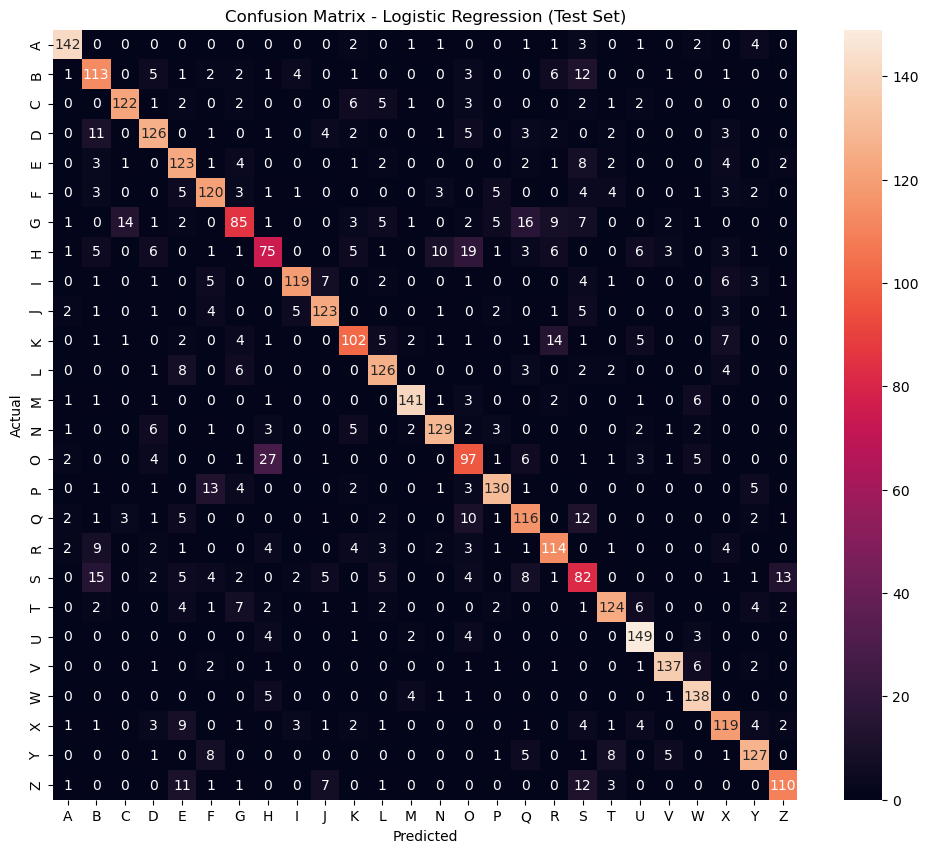

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_tst, y_tst_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Neural Network

In [11]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000, random_state=42)

# fit model
mlp.fit(X_trn, y_trn.values.ravel())

# training 
y_trn_pred = mlp.predict(X_trn)
print("Training Accuracy:", accuracy_score(y_trn, y_trn_pred))

# validation
y_vld_pred = mlp.predict(X_vld)
print("Validation Accuracy:", accuracy_score(y_vld, y_vld_pred))
print("\nClassification Report (Validation):")
print(classification_report(y_vld, y_vld_pred, target_names=le.classes_))

# Test
y_tst_pred = mlp.predict(X_tst)
print("Test Accuracy:", accuracy_score(y_tst, y_tst_pred))
print("\nClassification Report (Test):")
print(classification_report(y_tst, y_tst_pred, target_names=le.classes_))

Training Accuracy: 0.999609375
Validation Accuracy: 0.948125

Classification Report (Validation):
              precision    recall  f1-score   support

           A       0.98      0.97      0.98       126
           B       0.91      0.95      0.93       123
           C       0.95      0.94      0.94       118
           D       0.90      0.95      0.92       129
           E       0.94      0.96      0.95       123
           F       0.94      0.96      0.95       124
           G       0.90      0.87      0.89       124
           H       0.92      0.93      0.93       117
           I       0.96      0.95      0.95       121
           J       0.96      0.93      0.94       120
           K       0.96      0.94      0.95       118
           L       0.97      0.96      0.97       122
           M       0.97      0.96      0.96       127
           N       0.96      0.91      0.93       125
           O       0.91      0.92      0.91       121
           P       0.93      0.97    

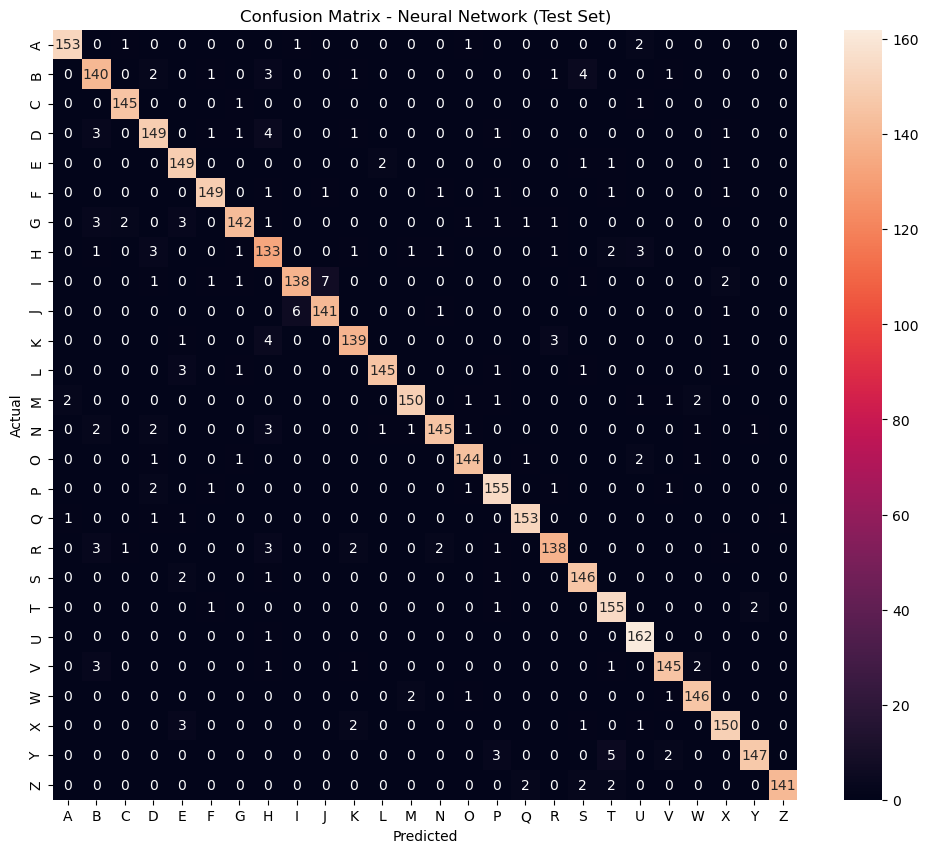

In [12]:
cm = confusion_matrix(y_tst, y_tst_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Neural Network (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

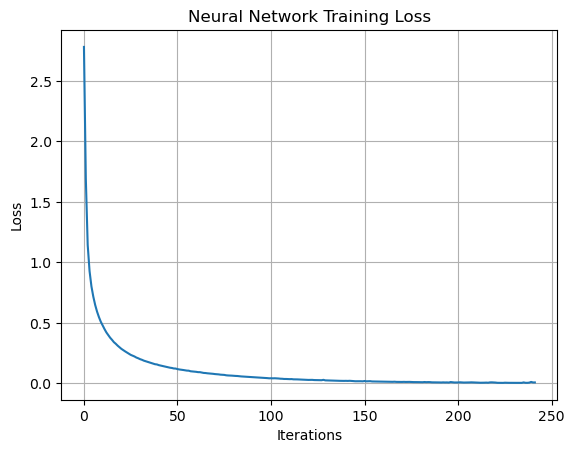

In [13]:
# MLP loss curve
plt.plot(mlp.loss_curve_)
plt.title("Neural Network Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()